<a href="https://colab.research.google.com/github/Nandhini-ds/Learner-Segmentation-Using-Clustering-Techniques/blob/main/Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statemnent**

*  Scaler is an online tech learning platform offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

*  A significant challenge for Scaler is understanding the diverse backgrounds of its learners, especially in terms of their current roles, companies, and experience. Clustering similar learners helps in customizing the learning experience, thereby increasing retention and satisfaction.

#Goal


As a data scientist working with Scaler's analytics team, the objective is to segment learners based on their job profile, company, CTC, experience, and job position to create meaningful clusters. These clusters will group learners with similar professional characteristics and help Scaler identify suitable companies, appropriate job roles, and relevant salary ranges for each learner based on their profile. This enables Scaler to make tailored content recommendations and provide specialized mentorship.

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("scaler_clustering.csv")
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


#Exploratory data analysis

In [ ]:
#Shape of data
df.shape

(205843, 7)

In [ ]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35394 entries, 0 to 35393
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        35394 non-null  int64  
 1   company_hash      35383 non-null  object 
 2   email_hash        35394 non-null  object 
 3   orgyear           35367 non-null  float64
 4   ctc               35393 non-null  float64
 5   job_position      24895 non-null  object 
 6   ctc_updated_year  35393 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
df.nunique()

,0
Unnamed: 0,205843
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


We drop variable **Unnamed: 0** because it does not contribute any meaningful information to the analysis or model performance.

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
#Duplicate records
df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [ ]:
df.isnull().sum()/len(df)*100

,0
company_hash,0.021376
email_hash,0.000000
orgyear,0.041779
ctc,0.000000
job_position,25.535967
ctc_updated_year,0.000000


**Observations**

*  Features company_hash, orgyear(Employment start date), and job_position cantain missing values of 0.02%,  0.041% and 25.5% respectively.

*  While missing values in **company_hash and orgyear** are **negligible**, the high proportion of missing values in **ob_position can significantly impact model performance**. Since these features are important for clustering, missing values were handled using appropriate **imputation techniques** rather than being dropped.

**Statistical summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


**observations**

*  We observe that for some learners, the earliest employment year is recorded as 0, and the maximum year values are also unusually high. These entries are suspicious and likely indicate data entry errors or missing/unknown employment information.

*  There is a large difference between minimum and maximum salary indicates high spread and possible skewness.

In [ ]:

df.describe(exclude=['int','float']).T

,count,unique,top,freq
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153279,1016,Backend Engineer,43554


**Observations**

*  The dataset contains **205,843** rows and **7 columns**.

*  **Backend Engineer** is the most frequent job role in the dataset.

*  **company_hash** and **email_hash** are encoded identifiers. They do not give direct information, but they are useful for grouping and removing duplicate records

**Univariate Analysis**

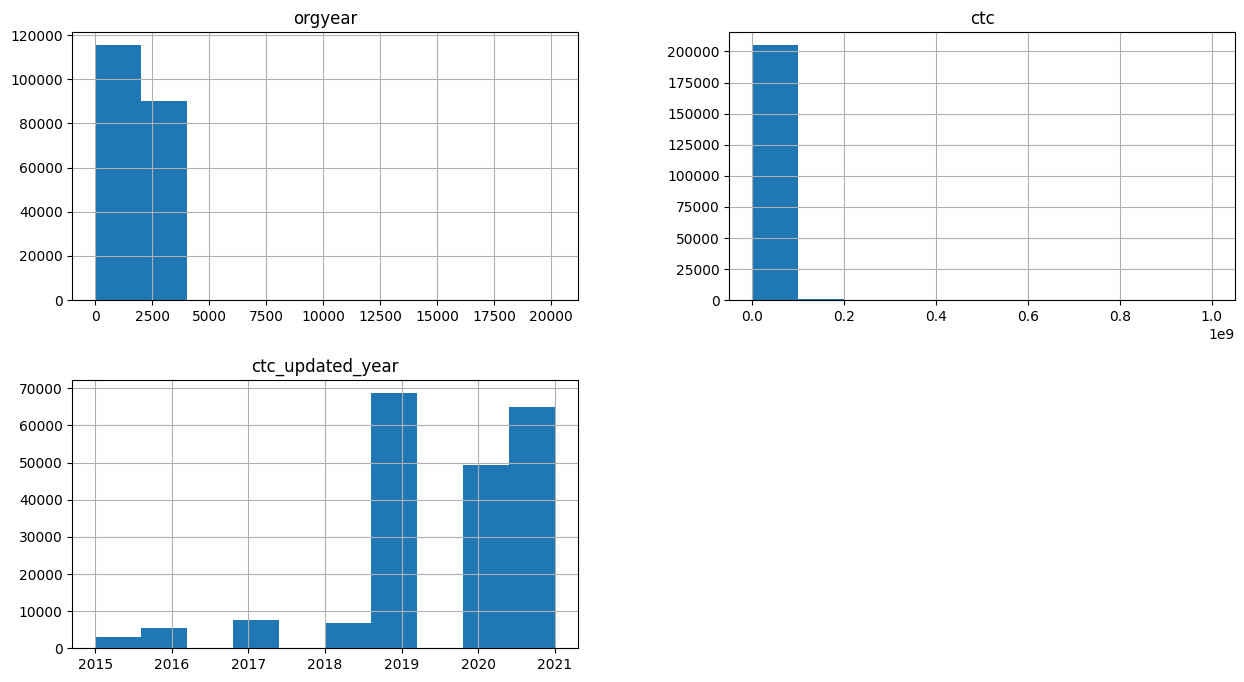

In [ ]:
df.hist(figsize=(15,8))
plt.show()

**Observations**

*  Employment starting year (orgyear) contains abnormal values such as **2500 and 20000**, which are not realistic. This indicates **data quality issues**  and requires further investigation and cleaning before modeling.

*  CTC values are concentrated on the **lower end**, with a few very high salaries. This suggests the presence of **outliers** and a **right-skewed** salary distribution.

**Categorical distribution**

In [ ]:
print(df['company_hash'].value_counts())

company_hash
nvnv wgzohrnvzwj otqcxwto    8337
xzegojo                      5381
vbvkgz                       3481
zgn vuurxwvmrt vwwghzn       3411
wgszxkvzn                    3240
                             ... 
pzhastbt tdqhzzq                1
ltbontu mj xzctowg              1
tkwqta ucn rna                  1
zhwrtvq ogenfvqt                1
bmq nvqstnxzs                   1
Name: count, Length: 37299, dtype: int64


In [ ]:
print(df['job_position'].value_counts())

job_position
Backend Engineer                    43554
FullStack Engineer                  24717
Other                               18071
Frontend Engineer                   10417
Engineering Leadership               6870
                                    ...  
Business Analyst / Product Owner        1
Principal consultant                    1
App Developer                           1
Digital Marketing                       1
Jr. Prod Specialist                     1
Name: count, Length: 1016, dtype: int64


In [ ]:
print(df['email_hash'].value_counts())

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
                                                                    ..
3def1401b5a8879eeb4a8465663a9c6c66702c85444d7ede5816f58792eb9d41     1
1a304832f202aafe1b12449189a7d5809b8aeb202e19fc15163b0c27c722ff27     1
e3fd08d199c5d805d7b587de710f1ca4e7e686570d07b56c82273a9be943f98b     1
ebcaf397ef5084e05889a6e9a0c3f96a5c8fb0b16749cef5ee3ce31a0271c12b     1
134cc4a76a119493d523f1855a3b7106f64287455d5cd4bb14f4ad0659fe8a5f     1
Name: count, Length: 153443, dtype: int64


In [ ]:
df['ctc_updated_year'].value_counts()

,count
ctc_updated_year,
2019.0,68688
2021.0,64976
2020.0,49444
2017.0,7561
2018.0,6746
2016.0,5501
2015.0,2927


In [ ]:
df['orgyear'].value_counts()



,count
orgyear,
2018.0,25256
2019.0,23427
2017.0,23239
2016.0,23043
2015.0,20610
...,...
2204.0,1
1900.0,1
38.0,1


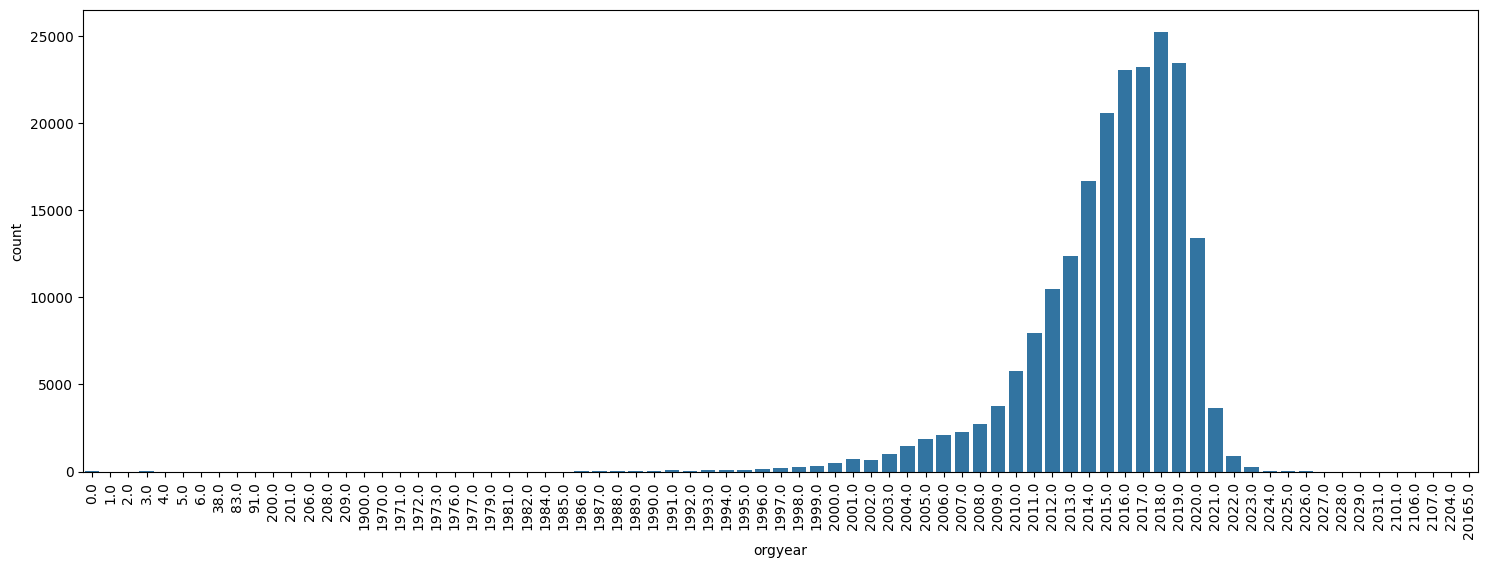

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['orgyear'])
plt.xticks(rotation=90)
plt.show()

* As suspected, the orgyear feature includes invalid values such as 0-2 and extreme future years (e.g., 201650), indicating data quality issues. To ensure the analysis is not distorted, these values can handle carefully by either replacing them with NaN or capping them within a realistic range.

In [ ]:
current_year = pd.Timestamp.now().year

min_year = 1900
max_year = current_year

In [ ]:
df.loc[
    (df['orgyear'] < min_year) | (df['orgyear'] > max_year),
    'orgyear'
] = np.nan


In [ ]:
df['orgyear'].value_counts()

,count
orgyear,
2018.0,24642
2019.0,22749
2017.0,22722
2016.0,22452
2015.0,20092
2014.0,16273
2020.0,13041
2013.0,12034
2012.0,10207


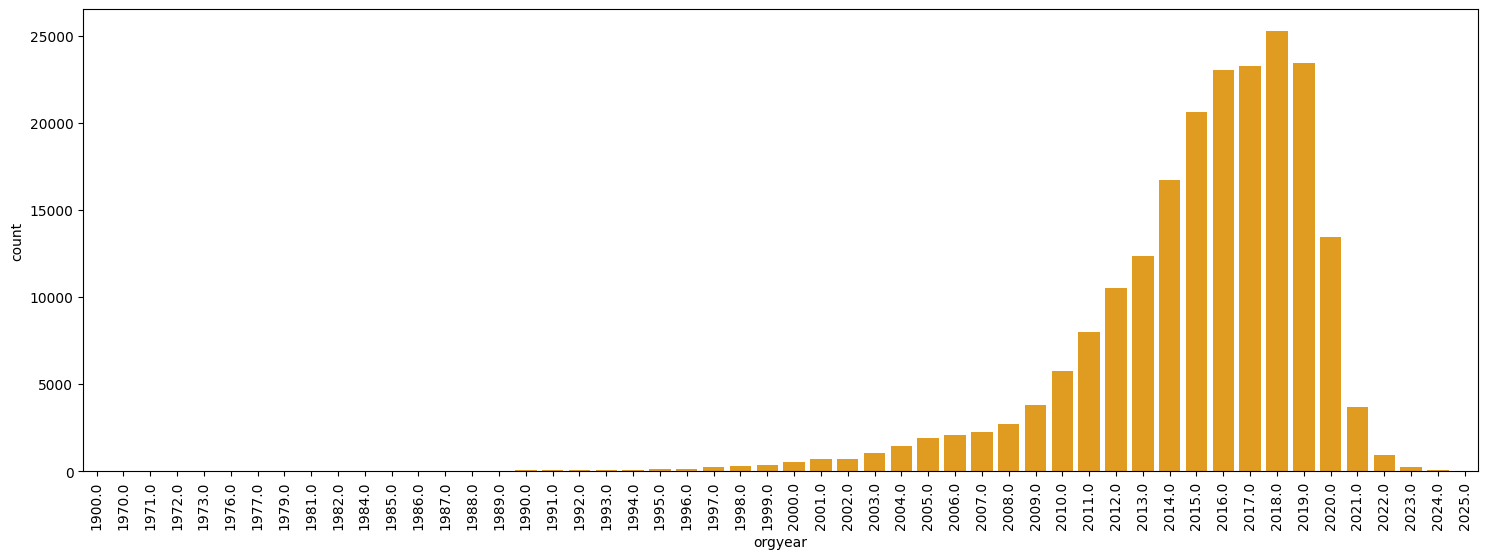

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['orgyear'],color='orange')
plt.xticks(rotation=90)
plt.show()

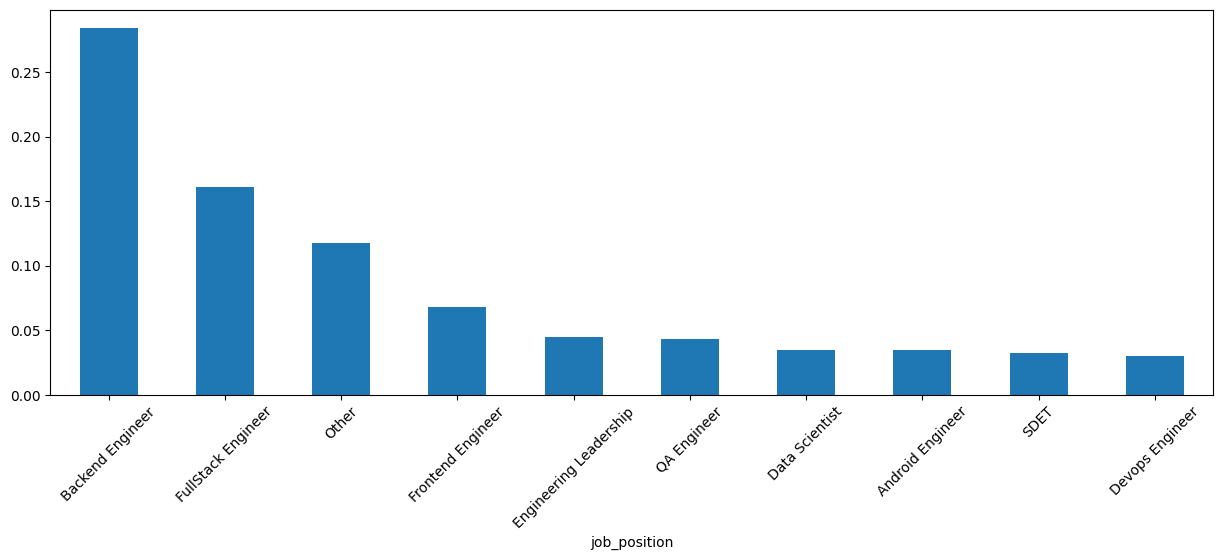

In [ ]:
plt.figure(figsize=(15,5))
df['job_position'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

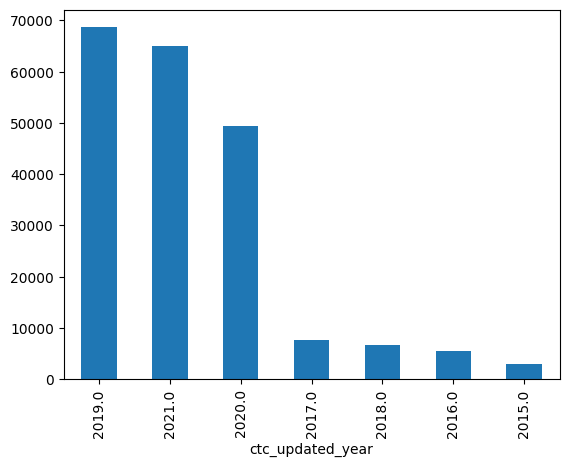

In [ ]:
df['ctc_updated_year'].value_counts().plot(kind='bar')
plt.show()

**Insights**

*  Most learners have employment start years concentrated between 2016 to 2019.

*  A significant proportion of learners hold **technical roles**, with **Backend Engineer** being the most common job role, followed by **Full Stack Developer**. Other roles appear in much smaller numbers, indicating that **technical roles dominate the dataset.**

*  For most learners, CTC updates occurred between 2019 and 2021, suggesting that salary revisions were concentrated in recent years.

#Data Pre-processing

**Imputation**

In [ ]:
df['job_position']=df['job_position'].fillna('Not Available')

df['orgyear'] = (
    df.groupby('job_position')['orgyear']
      .transform(lambda x: x.fillna(x.median()))
)

**Data Cleaning**

In [ ]:
import re
def clean_string(s):
    if not isinstance(s, str):
        s = str(s)
    return re.sub('[^A-Za-z0-9 ]+', '', s)

# Apply the function to the 'company_hash' column
df['company_hash'] =df['company_hash'].apply(clean_string)

In [ ]:
df['company_hash'].isna().sum()

np.int64(0)

In [ ]:
special_check = ['company_hash', 'job_position']

for col in special_check:
    print(df[col].str.contains(r'[^A-Za-z0-9 ]', regex=True).value_counts())
    print("-"*135)

company_hash
False    205843
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
job_position
False    205165
True        678
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------


The job_position column shows the presence of noisy data, with 678 records identified as inconsistent.

In [ ]:
#After imputation
df.isnull().sum()

,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


In [ ]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Not Available,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Not Available,2019.0


Each learners salary update year has been recorded, which currently results in multiple rows per learner. To simplify the analysis, we will consider only the most recent salary update year for each learner.

In [ ]:
recent_df = df.sort_values('ctc_updated_year', ascending=False).groupby('email_hash').first().reset_index()
recent_df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,FullStack Engineer,2019.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,Not Available,2018.0


In [ ]:
recent_df.shape

(153443, 6)

In [ ]:
recent_df['job_position'].nunique()

735

In [ ]:
#normalizing noise data
import re

def clean_job_role(s):
    if not isinstance(s, str):
        s = str(s)
    # Replace common separators with a space
    s = re.sub(r'[-/\\,]', ' ', s)
    # Replace multiple spaces with single space
    s = re.sub(r'\s+', ' ', s)
    # Strip leading/trailing spaces
    s = s.strip()
    # Convert to title case
    s = s.title()
    return s

recent_df['job_position'] = recent_df['job_position'].apply(clean_job_role)

In [ ]:
recent_df['job_position'] = recent_df['job_position'].str.strip().str.upper()

recent_df['job_position'] = recent_df['job_position'].str.replace(
    r'\s+at\s+.*$', '', regex=True, case=False
)

In [ ]:
recent_df[recent_df['job_position'].str.fullmatch(r'(?:\d+\.\d+|\d+|\.\d+)')]

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
5620,0911dcca341fb4a54a729d0a5bf3adcc467c1ac0cf3322...,yaew mvzp,2001.0,100000000,7033771951,2021.0
53252,590525d0fa3a35611733ee3ee7fe55bf0927d7ab7d7401...,wgszxkvzn,2018.0,470000,.7,2021.0
62118,67afca6c3ae9816105fa30c171c2c8bd16e27ea3364990...,fyxntyvn lq,2016.0,600000,896651,2021.0
86298,9021063ea27d2c461c6b4c7e8c430d68eb3ed7affa3e19...,zgn vuurxwvmrt vwwghzn,2021.0,500000,91,2021.0
127688,d52bbb498b8dbf40e72e1b045f468ef28020382268626f...,wvbup12,2019.0,420000,7,2021.0
132305,dce41b12982b336dfcd702307d43ce65f29868f84d81b9...,ogenfvqt tzsxzttqxzs uqgetooxgzvro,2021.0,450000,857628,2021.0
151342,fc63ae4f44d7d209eab513e04292cbe23b45d32b147eda...,twgzztwn ogrhnxgzo uqxcvnt rxbxnta,2018.0,350000,737,2021.0


In [ ]:
mask=recent_df['job_position'].str.fullmatch(r'(?:\d+\.\d+|\d+|\.\d+)')
recent_df.loc[mask, 'job_position'] = 'Other'

In [ ]:
recent_df.loc[
    (recent_df['job_position'].str.len() <= 7) |
    (recent_df['job_position'].str.len() >= 60),
    'job_position'
].dropna().unique()

array(['OTHER', 'SDET', 'SDE 3', 'SDE 1', 'CLERK', 'OWNER', 'Other',
       'SALES', 'STUDENT', 'TYPING', 'ZOMATO', 'ACCOUNT', 'CLOUD',
       'INTERN', 'ASE', 'SDE II', 'SDE 2', 'BTA', 'MANAGER', 'CTO',
       'TESTER', 'POP', 'TRAINER', 'CRC', 'SDET 2', 'Q', 'UCM', 'SDEII',
       'AYS', 'AUDITOR', 'MTS', 'ADVISOR', 'BDA', 'TX SME', 'TELAR', 'SO',
       'NO JOB', 'TOYOTA', 'TA', 'TEACHER', 'FRESHER', 'NA', 'OTHERS',
       'CASHIER', 'STORW', 'BDM', 'WORKER',
       "SOME DATA ENTRY OPERATOR LIKE SOME COPY'S WRITE.TYPE AND UPLOAD",
       'DRIVER', 'NO', 'SE(R&D)', 'GROWTH', 'FARMER', 'HOD', 'SMTS',
       'TSC', 'SDE3', 'MTS2', 'PAT', 'SR.', 'SDET 3', 'SDE I', 'SE4', '.',
       'NULL', 'MTS II', 'TRAINEE', 'LEAD', 'L4', 'PA', 'PUNE'],
      dtype=object)

In [ ]:
noise={
    'Q':'OTHER',
    'NO':'OTHER',
    'UCM':'OTHER',
    'SDE 2':'SDE-2',
    'SDE I':'SDE 1',
    'SDEII':'SDE 2',
    'POP':'OTHER',
    'TX SME':'OTHER',
    'MEMBER OF TECHNICAL STAFF (MTS)':'MTS',
    'MEMBER OF TECHNICAL STAFF (MTS) 2':'MTS2',
    'MTS  II':'MTS2',
    'TELAR':'OTHER',
    'AYS':'OTHER',
    'WORKER':'OTHER',
    'SO':'OTHER',
    'GROWTH':'OTHER',
    'STORW':'OTHER',
    'PUNE':'Other',
    'JHARKHAND':'OTHER',
    'L4':'OTHER',
    'PA':'PROJECT ASSOCIATE',
    'NA':'OTHER',
    'NULL':'OTHER',
    'NOW IAM NOT WORKING, WAITING FOR JOB':'NO JOB',
    "SOME DATA ENTRY OPERATOR LIKE SOME COPY'S WRITE.TYPE AND UPLOAD":"DATA ENTRY",
    '.':'OTHER',
    'PHD. STUDENT':'STUDENT',
     'NEW GRADUATE':'FRESHER',
    'LEAD':'OTHER',
    'SE4':'OTHER',
    'SR':'OTHER',
    'TSC':'OTHER',
     'TOYOTA':'OTHER',
    'ZOMATO':'OTHER',
    "CAN'T REVEAL":'OTHER',
    'OTHERS':'OTHER',
    'Other':'OTHER'
}

In [ ]:
recent_df['job_position'] = recent_df['job_position'].replace(noise)

In [ ]:
recent_df['job_position'].nunique()

617

In [ ]:
recent_df['job_position']=recent_df['job_position'].str.title()

**Feature Engineering**

In [ ]:
recent_df['orgyear'] = recent_df['orgyear'].round().astype('Int64')
recent_df['Experience'] =current_year - recent_df['orgyear']

In [ ]:
recent_df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Experience
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000,Backend Engineer,2019.0,13
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020.0,12
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,Fullstack Engineer,2019.0,4
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000,Fullstack Engineer,2021.0,21
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000,Not Available,2018.0,16


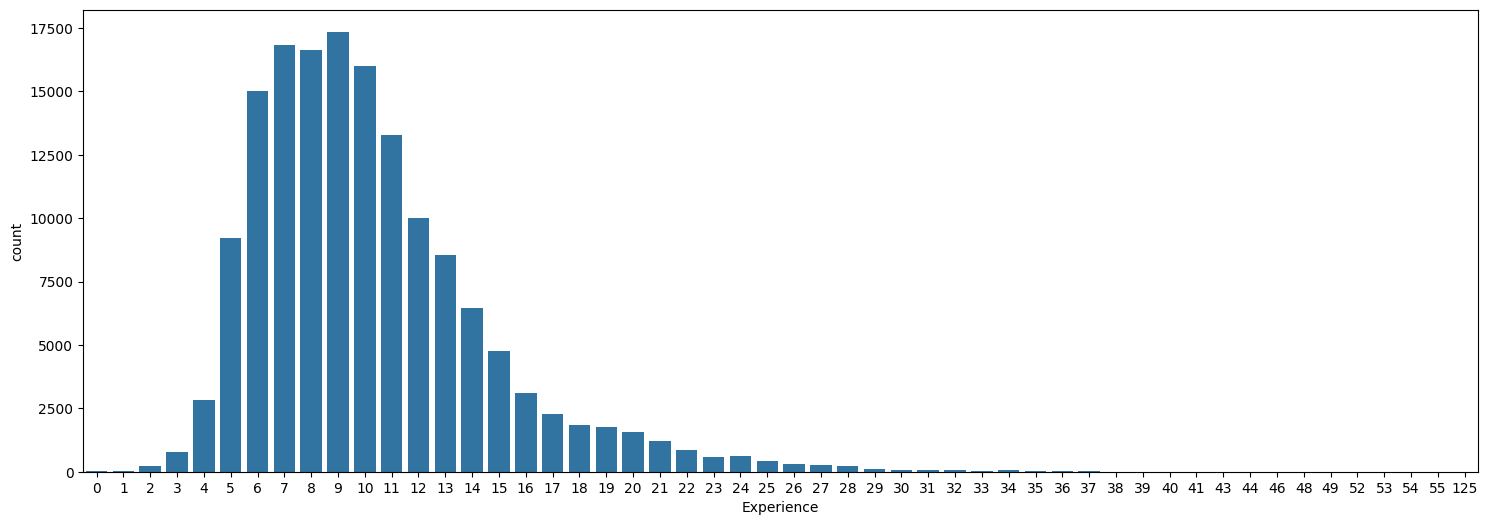

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=recent_df['Experience'])
plt.show()

**Insights**

*  Although a bar plot was used, the distribution resembles a histogram and shows a moderately right-skewed pattern.

*  Most learners fall within the 5 to 13 years of experience range, with a gradual tail extending toward higher experience values.

**Outlier Detection**

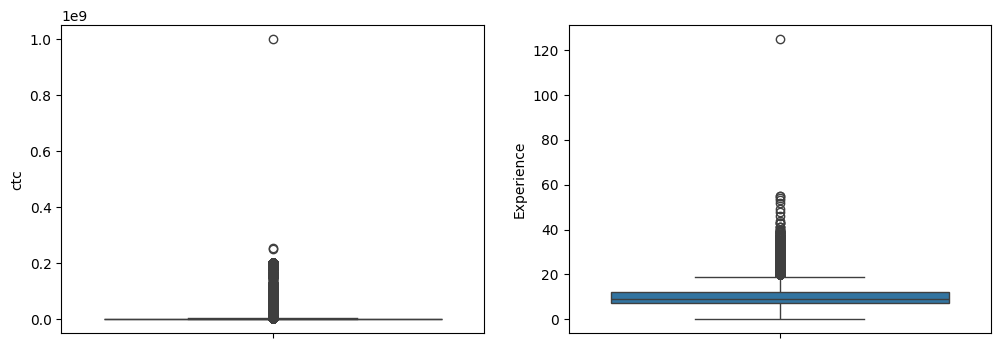

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(recent_df['ctc'])

plt.subplot(1,2,2)
sns.boxplot(recent_df['Experience'])
plt.show()

**Insights**

* The boxplot indicates the presence of extreme outliers in learners CTC. The majority of learners have CTC values below 0.3e9.

*  An extreme outlier of **125 years** of experience is observed, which is unrealistic. The median experience of learners is 15 years, and the upper whisker extends to approximately 20 years.

*  Applying the IQR method may remove some valid high-end values. Therefore,  capping (winsorization) is preferred to limit the impact of extreme values while preserving the overall data distribution.

In [ ]:
print(recent_df['ctc'].quantile(0.99))
print(recent_df['ctc'].quantile(0.01))

27436999.999999534
40000.0


**Capping**

In [ ]:
cape = ['ctc','Experience']
for i in cape:
    lower= recent_df[i].quantile(0.01)
    upper=recent_df[i].quantile(0.99)
    recent_df[f'{i}_clean']=recent_df[i].clip(lower=lower, upper=upper)

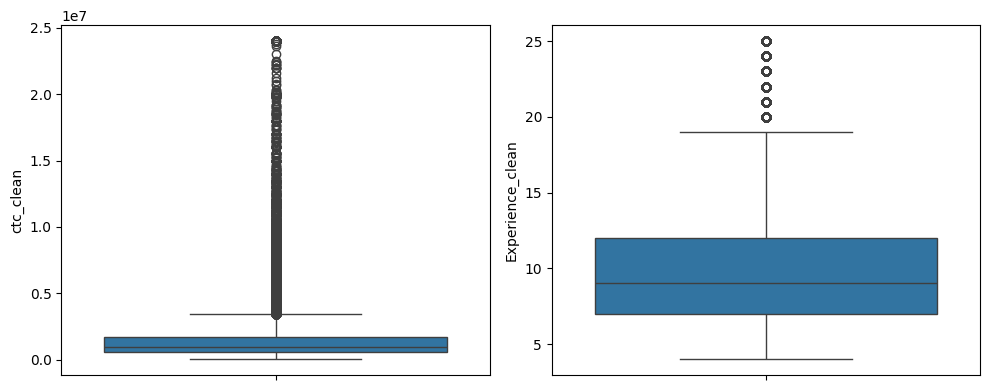

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(recent_df['ctc_clean'])

plt.subplot(1,2,2)
sns.boxplot(recent_df['Experience_clean'])
plt.tight_layout()
plt.show()

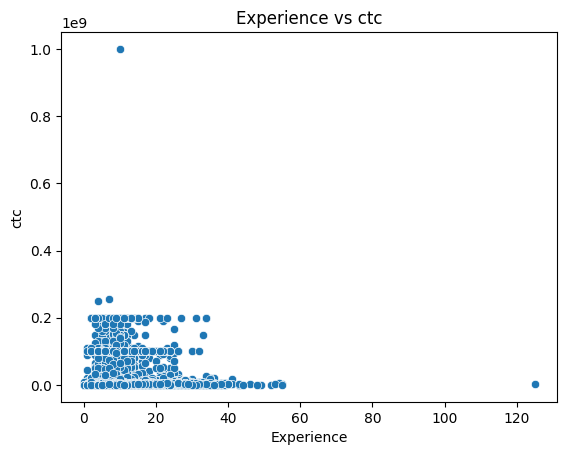

In [ ]:
sns.scatterplot(x='Experience', y='ctc', data=recent_df)
plt.title("Experience vs ctc")
plt.show()

**Is it always true that with an increase in years of experience, the CTC increases?**


*  No, it is not always true that an increase in years of experience leads to a higher CTC.

*  The analysis shows no strong linear relationship between experience and CTC. While some learners experience gradual salary growth with increasing experience, others show minimal or stagnant salary increases even after several years.

*  Conversely, there are learners with relatively fewer years of experience (5-10 years) who earn significantly higher salaries. This indicates that salary progression depends more on job role, company, and skill demand rather than experience alone.

*  For example, employees in high-demand technical roles or working in premium companies earn higher CTC despite having fewer years of experience, whereas employees with greater experience in lower-paying roles or companies receive comparatively lower salaries.

#Manual Clustering

**Learner Grouping by Company, Job Role, and Experience Level**

In [ ]:
manual_cluster1=recent_df.groupby(['company_hash','job_position','Experience']).agg(avg_designation=('ctc','mean'),
  median_ctc=('ctc','median'),
  min_ctc    = ('ctc', 'min'),
  max_ctc    = ('ctc', 'max'),
  cnt  = ('ctc', 'count')
).reset_index()

In [ ]:
df1=recent_df.copy()
merge_1=df1.merge(manual_cluster1, on=['company_hash','job_position','Experience'], how='left')


In [ ]:
conditions = [
    merge_1['ctc'] > merge_1['avg_designation'],
    merge_1['ctc'] == merge_1['avg_designation'],
    merge_1['ctc'] < merge_1['avg_designation']
]

choices = [1, 2, 3]

merge_1['designation'] = np.select(conditions, choices)

In [ ]:
merge_1.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Experience,avg_designation,median_ctc,min_ctc,max_ctc,cnt,designation
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000,Backend Engineer,2019.0,13,3.075968e+06,2700000.0,53000,16800000,47,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020.0,12,2.500000e+05,250000.0,250000,250000,1,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,Fullstack Engineer,2019.0,4,1.228200e+06,1300000.0,710000,1600000,5,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000,Fullstack Engineer,2021.0,21,2.000000e+06,2000000.0,2000000,2000000,1,2
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000,Not Available,2018.0,16,3.766667e+06,3900000.0,3400000,4000000,3,3


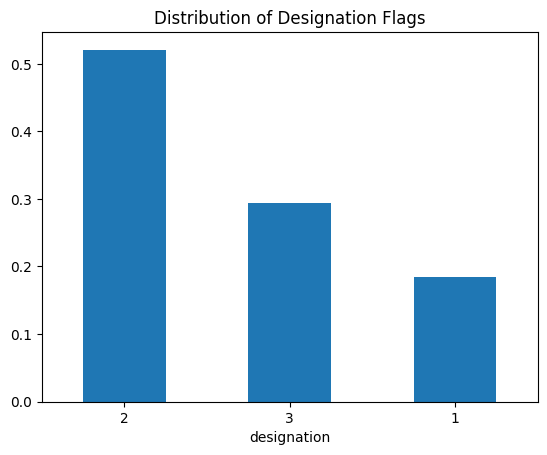

In [ ]:
merge_1['designation'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Designation Flags")
plt.xticks(rotation=1)
plt.show()

At the company–job–experience level, many employees earn close to the average salary of their peer group.
Employees earning above the average salary of their peer group are fewer than those earning below it.

**Company & Job Position level.**

In [ ]:
class_df=recent_df.groupby(['company_hash','job_position']).agg(avg_class=('ctc','mean'),
                                                       median=('ctc','median'),
                                                       min_ctc=('ctc','min'),
                                                       max_ctc=('ctc','max'),
                                                       cnt=('ctc','count')).reset_index()
merge_1=df1.merge(class_df, on=['company_hash','job_position'],how='left')

In [ ]:
class_df.head()

,company_hash,job_position,avg_class,median,min_ctc,max_ctc,cnt
0,0,Other,100000.0,100000.0,100000,100000,1
1,0000,Other,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,Android Engineer,270000.0,270000.0,270000,270000,1
3,01 ojztqsj,Frontend Engineer,830000.0,830000.0,830000,830000,1
4,05mz exzytvrny uqxcvnt rxbxnta,Not Available,1100000.0,1100000.0,1100000,1100000,1


In [ ]:
conditions = [merge_1['ctc'] > merge_1['avg_class'],
              merge_1['ctc'] == merge_1['avg_class'],
              merge_1['ctc'] < merge_1['avg_class']
              ]
choices=[1, 2, 3]
merge_1['class'] = np.select(conditions,choices)

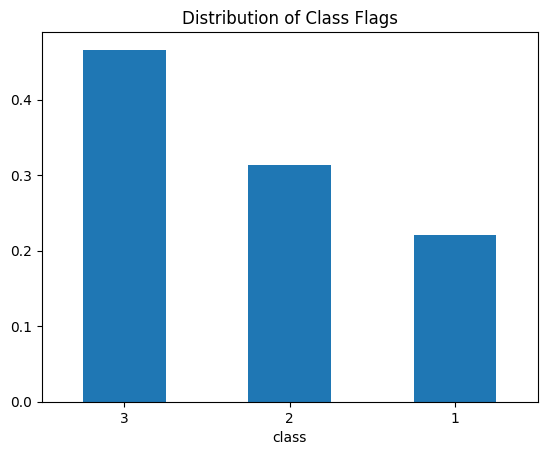

In [ ]:
merge_1['class'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Class Flags")
plt.xticks(rotation=1)
plt.show()

**Insights**

*  A majority of employees earn less than the average salary of their respective job roles within the same company.

*  The rest of employees earn below the job-level average salary, with higher compensation concentrated among a smaller group that likely reflects senior or leadership roles.

**Company level**

In [ ]:
tier_df = recent_df.groupby('company_hash').agg(avg_tier=('ctc','mean'),
                                      median_ctc=('ctc','median'),
                                      min_ctc=('ctc','min'),
                                      max_ctc = ('ctc', 'max'),
                                      count=('ctc', 'count')).reset_index()
merge_1=df1.merge(tier_df, on=['company_hash'], how='left')

In [ ]:
tier_df.head()

,company_hash,avg_tier,median_ctc,min_ctc,max_ctc,count
0,0,100000.0,100000.0,100000,100000,1
1,0000,300000.0,300000.0,300000,300000,1
2,01 ojztqsj,550000.0,550000.0,270000,830000,2
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.0,1100000.0,1100000,1100000,1
4,1,175000.0,175000.0,100000,250000,2


In [ ]:
conditions = [merge_1['ctc'] > merge_1['avg_tier'],
              merge_1['ctc'] == merge_1['avg_tier'],
              merge_1['ctc'] < merge_1['avg_tier']]

choices = [1, 2, 3]

merge_1['tier'] = np.select(conditions, choices)

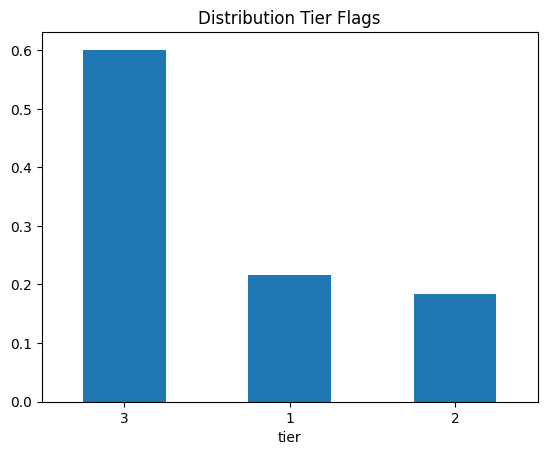

In [ ]:
merge_1['tier'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution Tier Flags")
plt.xticks(rotation=1)
plt.show()

**Insights**

*  Around 60% of employees earn below their company's average salary.

*  Only about 40% of employees earn at or above the company average salary.

**1. Which companies dominate in Tier 1 and why might this be the case?**

In [ ]:
# Dominance Based on CTC
tier1 = merge_1[merge_1['tier'] == 1]

company_stats = (
    tier1
    .groupby('company_hash')
    .agg(
        avg_ctc=('ctc', 'mean'),
        employee_count=('ctc', 'count')
    )
    .reset_index()
)
company_stats.sort_values('avg_ctc',ascending=False)

,company_hash,avg_ctc,employee_count
3274,obvqnuqxdwgb,255555555.0,1
5417,tzkxsbv,200000000.0,1
16,20152019,200000000.0,1
6276,vrnxoghqwt,200000000.0,1
596,btnrxet,200000000.0,1
...,...,...,...
2430,mlxn,15000.0,1
2531,mrxzp22,12000.0,1
1762,gutzoggi,9500.0,1
5587,uqtu ntwyzgrgsxto,2400.0,1


In [ ]:
#Dominance Based on Employee Distribution
company_stats[company_stats['employee_count'] >= 100]

,company_hash,avg_ctc,employee_count
230,atrr tbw,3.198893e+06,103
461,bgqsvz onvzrtj,5.046596e+06,114
832,bxwqgogen,6.855423e+06,454
886,cbfvqt,4.965070e+06,143
1270,eqtoytq,1.123195e+07,116
1337,erxupvqn,6.095101e+06,222
1549,fvrbvqn rvmo,4.343729e+06,229
1686,gqvwrt,2.987147e+06,610
1710,grv vzx ntwyzgrgsxto ucn rna,3.425582e+06,137
2012,ihvrwgbb,3.988818e+06,137


**Insights**

*  Dominant companies in Tier-1 are those that combine competitive salaries with a substantial number of learners employed. From the analysis, companies such as **gqvwrt, bxwqgogen, vbvkgz, vagmt, uvjnb, and eqtoytq** stand out because they maintain a balance between average CTC and employee count.

     *  Some companies pay extremely high salaries but have only one or very few learners. These represent outliers and do not indicate true dominance.

     *   Other companies employ hundreds of learners but offer only moderate salaries. While they have scale, their pay may not be as competitive.

*  When we look at both salary and employee count together, the truly dominant Tier-1 companies are those that pay well and hire many learners. This shows that they have a strong organizational setup, a solid business presence, and a high demand for skilled professionals. In short, their large workforce and consistently good pay are what make them leaders in Tier-1.

**Are there any notable patterns or insights when comparing learners from
Tier 3 across different companies?**

In [ ]:
tire_3=merge_1[merge_1['tier'] == 3]
uni=tire_3['company_hash'].value_counts().reset_index()

uni= uni.rename(columns={'count':'total_company'})
uni

,company_hash,total_company
0,nvnv wgzohrnvzwj otqcxwto,5134
1,xzegojo,3312
2,zgn vuurxwvmrt vwwghzn,2147
3,wgszxkvzn,2088
4,vbvkgz,2059
...,...,...
8526,ojzguojo xzaxv ucn rna,1
8527,trvqv sqghu yghoxzs uqgunxstq bvpvvz,1
8528,fxzkg,1
8529,mvlvl wvuxnvr,1


In [ ]:
learner_df=tire_3.merge(uni, on='company_hash',how='left')
learner_df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Experience,avg_tier,median_ctc,min_ctc,max_ctc,count,tier,total_company
0,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000,Fullstack Engineer,2019.0,4,1.472905e+06,1225000.0,10000,6000000,158,3,106
1,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018,450000,Database Administrator,2021.0,7,2.105046e+06,459999.0,600,200000000,5257,3,5134
2,000413749127d10b84fe43ada378c6a203686e5c04a61f...,wvoyxej,2004,800000,Product Designer,2019.0,21,1.522857e+06,1400000.0,600000,3200000,7,3,5
3,00041477f085dcc6b210238762f2a4b178eda3deac353e...,nvnv wgzohrnvzwj otqcxwto,2011,160000,Support Engineer,2021.0,14,2.105046e+06,459999.0,600,200000000,5257,3,5134
4,00053f5036774ef0caa40369337b12019420210d9e8625...,btqwtatomtzk qtotvqwy vza atctrgubtzn xzaxv,2018,1050000,Backend Engineer,2021.0,7,1.529426e+06,1200000.0,100000,10000000,47,3,35


In [ ]:
learner_df['job_position'].value_counts()[0:5]

,count
job_position,
Not Available,23282
Backend Engineer,20752
Fullstack Engineer,11042
Other,8932
Frontend Engineer,4687


**Insights**

*  Comparing learners from Tier 3 across different companies Engineering roles such as especially Backend, Full-stack, and Frontend—appear across the largest number of companies in Tier-3

*  Another noteable pattern is that number of unique learners exceeds the number of companies in tier 1, indicating that multiple learners are associated with the same company rather than evenly distributed.

*  Some companies show unusually high or low salaries, likely due to outliers or inconsistent data entries

*  Learners in the same company occupy different positions, from technical to support roles, suggesting varying levels of demand and compensation structures across roles.

**Top 10 employees earning more than most of the employees in the company**

In [ ]:
top_10 = merge_1[merge_1['tier']==1].sort_values('ctc',ascending=False).head(10)
top_10[['email_hash','ctc']]

,email_hash,ctc
54673,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,255555555
40349,4368cc6185184b811c3a4b9cef05dd1e45a682a6e94056...,200000000
117565,c44995942d317b3a36725bf0bfb34412741fbb35839177...,200000000
117611,c45a51fdb92b3e1943ae10a8e2d2698971545ba1d0366c...,200000000
144122,f079244e22acc376ef64b780d34a858baaa77c60071a2e...,200000000
17646,1d1c9160dd039fe79a4f1899d2c97f1fe950969a20c45d...,200000000
97856,a35a5abbe9fb056421bdd9aca4440acfb93e37c823564d...,200000000
9441,0f7322f8f4423e695df58edb4f002dac637d8de021373a...,200000000
9469,0f7e7ebdae89364a5c20d32fed1886003a4375ed25531c...,200000000
40191,431c610cffb5f699476173431bb1f47a51bcc680407e44...,200000000


**Top 10 employees of data science in each company earning more than their peers**

In [ ]:
datascience = (
    merge_1[
        (merge_1['class'] == 1) &
        (merge_1['job_position'] == 'Data Scientist')
    ]
    .sort_values(['company_hash', 'ctc'], ascending=[True, False])
    .groupby('company_hash')
    .head(10)
)

ans=datascience[['company_hash', 'email_hash', 'ctc']]
ans.head(10)

,company_hash,email_hash,ctc
94179,247vx,9d2537610d57179230806bb77258f63c3134b8fde9aa3a...,2600000
132882,247vx,ddd9683a58865398ed934ee7faeb0825e515f2fe3cdaad...,2500000
105085,3p ntwyzgrgsxto,af617ba27ec944771314f1c2d739b8208d2b3337800f8f...,1800000
97918,3rgi,a372713f7d18e6f03b5b469cbd1ddb8145c2688597c528...,1710000
116463,3rgi,c27536d2fe174089c62eca78e6e643baef88a6100c1404...,1500000
29485,abx exzvzwt ucn rna,312427e90421d0fa2ad12b47b33cac872026635e5340e6...,1550000
69782,adw ntwyzgrgsj,74aaf8eb0536ecc80e60fbfd706c07075f768657b4ae84...,2790000
18776,adw ntwyzgrgsj,1f0a9f3b6a3de411b2ceece85ef7ef095278bf45496b0d...,1220000
91572,adw ntwyzgrgsj,98db3530e9a6dc27f3425daaf81b717a677e64a9994156...,1170000
43451,adw ntwyzgrgsxto,48a8a96b2f7e20c1f3e72b6492797a26cd4f7d373f971b...,1760000


**Bottom 10 employees of data science in each company earning less than their peers**

In [ ]:
bottom = merge_1[(merge_1['class'] == 3) &(merge_1['job_position'] == 'Data Scientist')]
result=bottom.sort_values(['company_hash','ctc'],ascending=[True,True]).groupby('company_hash').head()
result[['company_hash', 'email_hash', 'ctc']][0:10]

,company_hash,email_hash,ctc
57106,247vx,5f4b52a1c2539fe2e4b29a8470bc57dbace331b819a0af...,1440000
116970,247vx,c35054c043f6a02da3e6f142fbcb095f8145eb521137ff...,2150000
82310,3p ntwyzgrgsxto,89901f32acc07b5ca10c4ee5a9afda6de831cb84a0cbeb...,1000000
52763,3p ntwyzgrgsxto,583a9600d8e74d5f3f6627da6b4ff3c466bf5cfee5ae9f...,1200000
146131,3p ntwyzgrgsxto,f3b1e96456ad8a7d9cceb3901d763252ea2f56eb2ee7f4...,1200000
55369,3rgi,5c67aa9b1414eb0dc68b6acc70c978f0b429e1f24f32a9...,800000
35386,abx exzvzwt ucn rna,3aef83f2dddebbd9ffadfe2e42ad783a04b2607a55ebc1...,1500000
117543,adw ntwyzgrgsj,c4420d1b47d52e5237b85b0f65e62ed8645b1b032d01c9...,680000
65059,adw ntwyzgrgsj,6ca1d030df1927f2c0904548a99dea059fd0aeaf39cb21...,700000
12413,adw ntwyzgrgsj,1443f6d836c4dc24a7a79f7f81702e6b684abdd22ea50e...,800000


**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [ ]:
bottom_10 = (
    merge_1[merge_1['tier'] == 3]
    .sort_values('ctc', ascending=True)
    .head(10)
)

bottom_10[['email_hash', 'ctc']]

,email_hash,ctc
31852,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2
145496,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,6
21514,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,14
110681,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,15
148652,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,200
92811,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,600
111267,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,600
77015,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,600
152235,fdd4a762ae373cfa10fa2bf6dc995c8ed540160b834d0a...,1000
80957,8747d9599e2ba1a8624e8bea834ab7a870c89ccca74204...,1000


**Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X**

In [ ]:
filtered = merge_1[
    (merge_1['Experience'].isin([5,6,7])) &
    (merge_1['designation'] == 1)
]
top_10 = (
    filtered
    .sort_values(['company_hash', 'ctc'], ascending=[True, False])
    .groupby('company_hash')
    .head(10)
)

top_10[['email_hash', 'ctc', 'company_hash', 'Experience']][0:10]

,email_hash,ctc,company_hash,Experience
43083,49b65f0dfccb9288127bf07ea471f2509678975f796352...,1400000,1bs,7
44816,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,1350000,1bs,6
80004,88ccd81878293f2bd36abd93697f6f4eda1e5859376f32...,1350000,1bs ntwyzgrgsxto ucn rna,6
6694,0b0a8ac3ec7edb52aa77ee261996be715442970f864dde...,1000000,1bs ntwyzgrgsxto ucn rna,6
31576,35cd541318debaa847428fe2cbe0ba4dd7220fddbc9cec...,1000000,1bs ntwyzgrgsxto ucn rna,6
55992,5f821fa27f668fbc116b4186ab539ee438bbedd850fd25...,900000,1bs ntwyzgrgsxto ucn rna,7
84981,91221a92d3e60515fa97f120ba3f13bdbff7fd54543c55...,1400000,20142018,7
42249,482bf44a26d01aa6e8313253f8956ea8cc2f2206be9307...,900000,20152019,6
136739,e98b396e69f93078011e3d4fc85be086645adf35505b4c...,2000000,2018,7
118804,cafb2f0e36abae18894aed29d2c75900889628e0926b04...,1500000,2018,7


**Top 10 companies (based on their CTC)**

In [ ]:
top_10_company=recent_df.groupby('company_hash')['ctc'].max().reset_index().sort_values('ctc',ascending=False).head(10)
top_10_company

,company_hash,ctc
29720,whmxw rgsxwo uqxcvnt rxbxnta,1000150000
14189,obvqnuqxdwgb,255555555
1194,aveegaxr xzntqzvnxgzvr hzxctqoxnj,250000000
28708,vznxzg rvmo,200000000
19366,qtwpgzojo ntwy rvmo ucn rna,200000000
1755,ayr tduqtoo,200000000
21050,shbunxgz rvmo ogenfvqt ogrhnxgz,200000000
21013,sgraygbk wgzohrnxzs,200000000
17540,oyrgp xzegqbvnxgz xzaxv uqxcvnt rxbxnta,200000000
9252,kgbmx,200000000


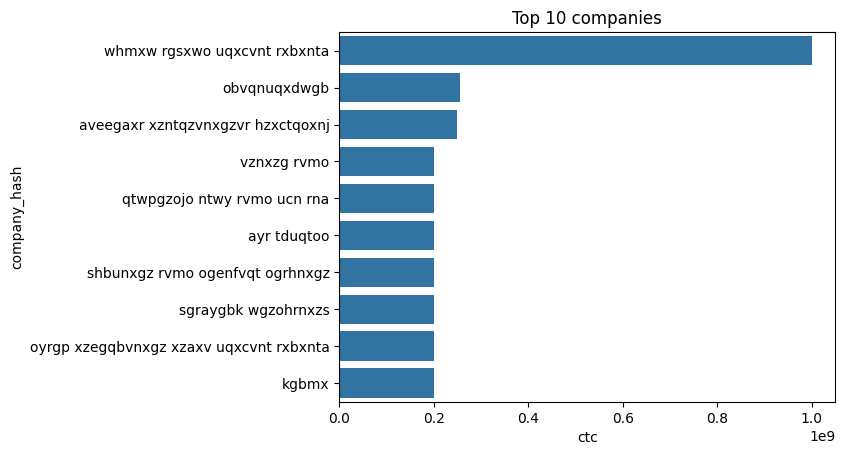

In [ ]:
sns.barplot(y='company_hash', x='ctc', data=top_10_company)
plt.title("Top 10 companies")
plt.show()

**Top 2 positions in every company (based on their CTC)**

In [ ]:
position_df = (
    recent_df
    .groupby(['company_hash', 'job_position'])
    .agg(median_ctc=('ctc', 'mean'))
    .reset_index()
)
position_df['rank'] = (
    position_df
    .groupby('company_hash')['median_ctc']
    .rank(method='dense', ascending=False)
)
top_2_positions = position_df[position_df['rank'] <= 2]

In [ ]:
top_2_positions

,company_hash,job_position,median_ctc,rank
0,0,Other,100000.0,1.0
1,0000,Other,300000.0,1.0
2,01 ojztqsj,Android Engineer,270000.0,2.0
3,01 ojztqsj,Frontend Engineer,830000.0,1.0
4,05mz exzytvrny uqxcvnt rxbxnta,Not Available,1100000.0,1.0
...,...,...,...,...
60181,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,940000.0,1.0
60182,zz,Not Available,500000.0,2.0
60183,zz,Other,1370000.0,1.0
60184,zzb ztdnstz vacxogqj ucn rna,Not Available,600000.0,1.0


Engineering roles dominate the top positions in most companies, while a few records have missing job position data that may also be associated with technical roles.

**job position that is commonly considered entry-level but has a few
learners with unusually high CTC**

In [ ]:
entry_job = recent_df[
    recent_df['job_position'].str.contains(
        'Intern|Associate|Trainee|Junior|Assistant',
        case=False, na=False
    )
]
summary=entry_job.groupby('job_position').agg(mean_ctc=('ctc','mean'),
                                      median_ctc=('ctc','median'),
                                      max_ctc=('ctc','max'),
                                      count=('ctc','count')).sort_values('max_ctc',ascending=False)

In [ ]:
result=summary[
    (summary['count'] < 100) &
    (summary['max_ctc'] >= 2 * summary['median_ctc'])
].sort_values(['median_ctc','count'],ascending=[False,True]).reset_index()

result

,job_position,mean_ctc,median_ctc,max_ctc,count
0,Intern Software Developer,4.466667e+06,2200000.0,10000000,3
1,Teaching Assistant,2.482667e+06,1800000.0,5500000,3
2,Assistant Manager,3.392667e+07,1180000.0,100000000,3
3,Intern,1.352500e+06,1175000.0,3025000,14
4,Associate Consultant,1.000000e+06,850000.0,2000000,4
5,Associate Software Engineer,6.850000e+05,640000.0,1500000,22
6,Senior Associate,1.118000e+06,600000.0,2500000,5
7,Associate,6.675000e+05,550000.0,1500000,4
8,Assistant System Engineer Trainee,6.783333e+05,338000.0,1367000,3
9,Software Development Engineer Intern,2.816667e+05,200000.0,500000,3


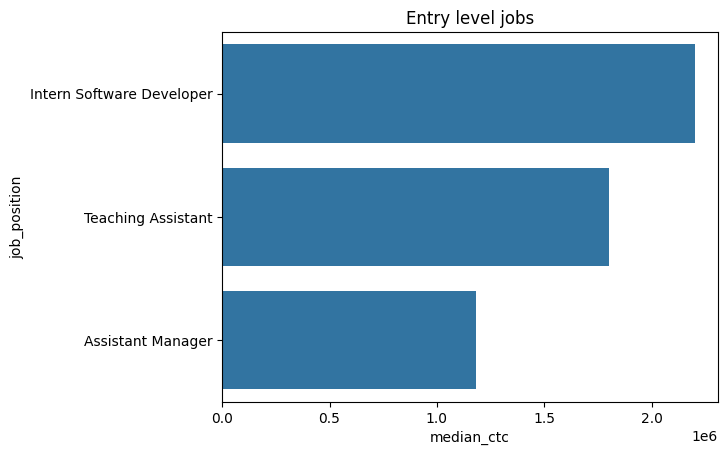

In [ ]:
sns.barplot(x='median_ctc', y='job_position', data=result.head(3))
plt.title("Entry level jobs")
plt.show()

**Insights**

*  For the Software Developer internship role, a few learners earn higher salaries compared to other entry-level roles.

*  Among entry-level positions, Teaching Assistant is the next highest paid role, followed by Assistant Manager.

*  This could be because technology roles are currently more in demand or emerging, or because some learners are working in top product-based companies that tend to offer better pay even at entry level.

**Average CTC of learners across different job positions**

In [ ]:
recent_df.groupby('job_position')['ctc'].mean().reset_index()

,job_position,ctc
0,Abap Developer,500000.0
1,Account,2000000.0
2,Administrator,3500000.0
3,Advisor,360000.0
4,Advisory System Analyat,680000.0
...,...,...
611,Vice President,4400000.0
612,Voice President,2950000.0
613,Web Developer (Full Stack),300000.0
614,Webcenter Consultant,300000.0


**For a given company, how does the average CTC of a Data Scientist compare
with other roles?**


In [ ]:
# Average CTC of Data Scientists per company
ds = recent_df[recent_df['job_position'] == 'Data Scientist']\
        .groupby('company_hash')['ctc'].mean().reset_index()\
        .rename(columns={'ctc':'ds_ctc', 'company_hash':'company_hash'})

# Average CTC of all other roles per company
other_roles = recent_df[recent_df['job_position'] != 'Data Scientist']\
                  .groupby(['company_hash','job_position'])['ctc'].mean().reset_index()\
                  .rename(columns={'ctc':'other_ctc', 'job_position':'job_position_y'})
comparison = ds.merge(other_roles, on='company_hash', how='left')
comparison

,company_hash,ds_ctc,job_position_y,other_ctc
0,10dvx rtvqzxzs,400000.0,NaN,NaN
1,1bs,1100000.0,Android Engineer,8.000000e+05
2,1bs,1100000.0,Backend Engineer,1.716154e+06
3,1bs,1100000.0,Engineering Leadership,3.400000e+06
4,1bs,1100000.0,Frontend Engineer,9.666667e+05
...,...,...,...,...
10469,zxztrtvuo,1825000.0,Frontend Engineer,1.133333e+06
10470,zxztrtvuo,1825000.0,Fullstack Engineer,8.396000e+05
10471,zxztrtvuo,1825000.0,Ios Engineer,1.200000e+06
10472,zxztrtvuo,1825000.0,Member Of Technical Staff,1.200000e+06


In [ ]:
comparison[comparison['ds_ctc'] <= comparison['other_ctc']]

,company_hash,ds_ctc,job_position_y,other_ctc
2,1bs,1.100000e+06,Backend Engineer,1.716154e+06
3,1bs,1.100000e+06,Engineering Leadership,3.400000e+06
5,1bs,1.100000e+06,Fullstack Engineer,1.433333e+06
6,1bs,1.100000e+06,Ios Engineer,2.700000e+06
7,1bs,1.100000e+06,Not Available,1.571875e+06
...,...,...,...,...
10455,zxxn ntwyzgrgsxto rxbxnta,1.166667e+06,Fullstack Engineer,1.084620e+07
10459,zxxn ntwyzgrgsxto rxbxnta,1.166667e+06,Product Designer,1.300000e+06
10465,zxztrtvuo,1.825000e+06,Backend Architect,3.000000e+06
10466,zxztrtvuo,1.825000e+06,Backend Engineer,2.061000e+06


**Insights**

*   While Data Scientists have a competitive salary in most companies, several roles such as Engineering Leadership, Backend Architect, and senior engineering positions earn higher on average within the same company.

*   For some companies, Data Scientists earn more than DevOps Engineers, while in others they earn less. This suggests that multiple factors including experience level, company type (startup vs. product-based), and project domain influence salary differences across roles.

#Unsupervised clustering

**Datapreparation for modeling**

In [ ]:
x=recent_df.drop(columns=['email_hash', 'company_hash'],axis=1)
x.head()

,orgyear,ctc,job_position,ctc_updated_year,Experience
0,2012,3500000,Backend Engineer,2019.0,13
1,2013,250000,Backend Engineer,2020.0,12
2,2021,1300000,Fullstack Engineer,2019.0,4
3,2004,2000000,Fullstack Engineer,2021.0,21
4,2009,3400000,Not Available,2018.0,16


**Encoding - Embedding Technique**

In [ ]:
numeric_cols = ['orgyear', 'ctc',	'ctc_updated_year','Experience']
job_position_embeddings = x.groupby('job_position')[numeric_cols].mean().reset_index()
job_position_embeddings = job_position_embeddings.rename(
    columns={col:f'job_position_{col}_mean' for col in numeric_cols}
)
job_position_embeddings.head()

,job_position,job_position_orgyear_mean,job_position_ctc_mean,job_position_ctc_updated_year_mean,job_position_Experience_mean
0,Abap Developer,2018.0,500000.0,2021.0,7.0
1,Account,2012.0,2000000.0,2021.0,13.0
2,Administrator,2007.0,3500000.0,2021.0,18.0
3,Advisor,2018.0,360000.0,2021.0,7.0
4,Advisory System Analyat,2014.0,680000.0,2021.0,11.0


In [ ]:
job_position_embeddings['job_position'].is_unique

True

In [ ]:
x_merged=x.merge(job_position_embeddings, on=['job_position'], how='left')

In [ ]:
print(len(recent_df))
print(len(x))

153443
153443


**Standardization of data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x_merged.drop(columns=['job_position']))

column = x_merged.columns.drop(['job_position'])
scaled_df = pd.DataFrame(x_scaled, columns=column)
scaled_df.head()

,orgyear,ctc,ctc_updated_year,Experience,job_position_orgyear_mean,job_position_ctc_mean,job_position_ctc_updated_year_mean,job_position_Experience_mean
0,-0.643031,0.075841,-0.359088,0.643031,0.043950,-0.328105,-0.604488,-0.043950
1,-0.414477,-0.173153,0.369858,0.414477,0.043950,-0.328105,-0.604488,-0.043950
2,1.413961,-0.092709,-0.359088,-1.413961,0.481345,-0.390420,0.598354,-0.481345
3,-2.471469,-0.039080,1.098805,2.471469,0.481345,-0.390420,0.598354,-0.481345
4,-1.328695,0.068179,-1.088035,1.328695,0.671880,-0.208334,1.007946,-0.671880


#Model building

**Checking clustering tendency**

 **Hopkins Statistic**

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
def hopkins_statistic(X, n_samples=100):
    X = np.array(X)
    m, d = X.shape
    if n_samples > m:
       n_samples = m
    idx = np.random.choice(m, n_samples, replace=False)
    X_sample = X[idx]
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)
    X_uniform=np.random.uniform(x_min, x_max, size=(n_samples,d))

    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    u_distances = nbrs.kneighbors(X_uniform, n_neighbors=1, return_distance=True)[0].flatten()
    w_distances = nbrs.kneighbors(X_sample, n_neighbors=2, return_distance=True)[0][:,1]  # exclude self

    H = u_distances.sum() / (u_distances.sum() + w_distances.sum())
    return H


In [ ]:
H = hopkins_statistic(x_scaled)
print(f"Hopkins Statistic: {H:.4f}")

if H > 0.75:
    print("Strong clustering tendency")
elif 0.5 < H <= 0.75:
    print("Moderate clustering tendency")
else:
    print("Data is close to random")

Hopkins Statistic: 0.9995
Strong clustering tendency


 Hopkins Statistic gives 0.9995, which indicates dataset is suitable for clustering.

**PCA Visualization Prior to Clustering**

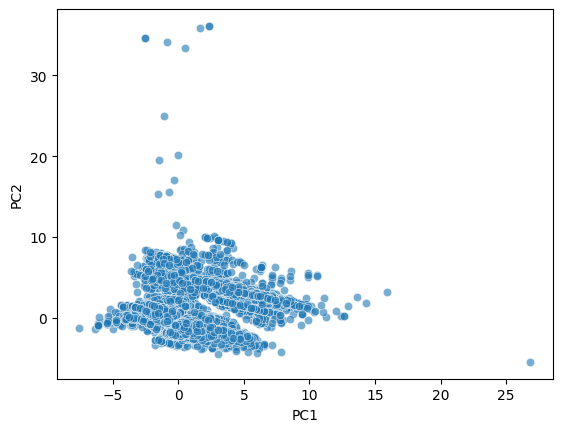

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
p_df=pd.DataFrame(pca.fit_transform(x_scaled),columns=['PC1','PC2'])

#Visuvalize
sns.scatterplot(x=p_df['PC1'], y=p_df['PC2'], alpha=0.6)
plt.show()

**K-means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []
K = range(2,8)
for k in K:
   kmeans = KMeans(n_clusters=k,init='k-means++')
   labels = kmeans.fit_predict(scaled_df)
   inertia.append(kmeans.inertia_)
   score = silhouette_score(scaled_df, labels)
   sil_score.append(score)


**Elbow Method**

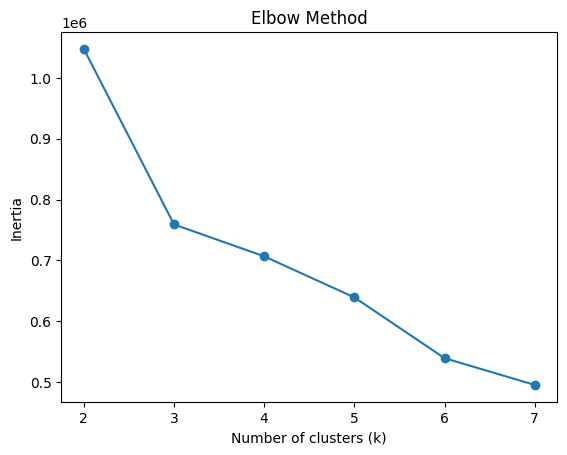

In [ ]:
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The Elbow Method indicates **3** as the optimal number of clusters, as the curve stops decreasing significantly after this point. For further validation, the Silhouette Score method can be used.

**Silhouette Score**

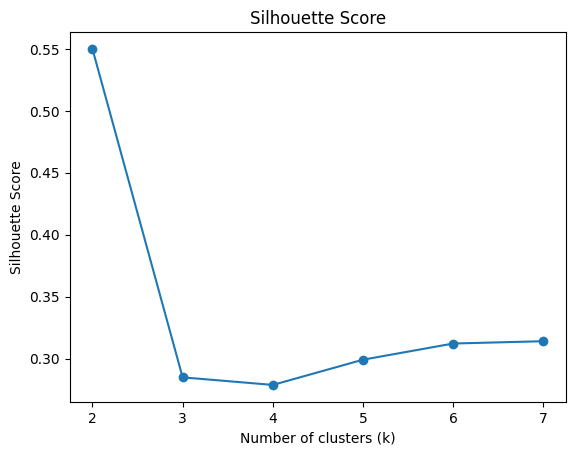

In [ ]:
plt.plot(K, sil_score, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

**K-means Clustering**

In [ ]:
k_opt = 3

kmeans_final = KMeans(
    n_clusters=k_opt, init='k-means++', n_init=10, random_state=42
    )
scaled_df['kmeans_cluster'] = kmeans_final.fit_predict(scaled_df)

recent_df['kmeans_cluster'] = kmeans_final.fit_predict(scaled_df)


In [ ]:
recent_df.groupby('kmeans_cluster').agg(
                                    {'email_hash':'count',
                                     'company_hash':'count',
                                     'ctc':'mean',
                                     'orgyear':'mean',
                                     'Experience':'mean'
                                     }).reset_index()

,kmeans_cluster,email_hash,company_hash,ctc,orgyear,Experience
0,0,82918,82918,2.815386e+06,2017.25571,7.74429
1,1,9142,9142,3.886291e+06,2008.162984,16.837016
2,2,61383,61383,1.892718e+06,2012.504895,12.495105


In [ ]:
recent_df.groupby('kmeans_cluster').agg(
                                    {'email_hash':'count',
                                     'company_hash':'count',
                                     'ctc':'mean',
                                     'orgyear':'mean',
                                     'Experience':'mean'
                                     }).reset_index()

,kmeans_cluster,email_hash,company_hash,ctc,orgyear,Experience
0,0,61419,61419,1.801334e+06,2012.500741,12.499259
1,1,9081,9081,3.934157e+06,2008.151085,16.848915
2,2,82943,82943,2.879003e+06,2017.255465,7.744535


**Hierarchical Clustering (Agglomorative)**

In [ ]:
scaled_sample = scaled_df.sample(n=5000, random_state=42)
scaled_sample.head()

,orgyear,ctc,ctc_updated_year,Experience,kmeans_cluster,job_position_orgyear_mean,job_position_ctc_mean,job_position_ctc_updated_year_mean,job_position_Experience_mean
39677,0.728297,-0.081217,-0.359088,-0.728297,0,0.043950,-0.328105,-0.604488,-0.043950
48859,0.042633,-0.085048,-0.359088,-0.042633,1,-0.036976,-0.437863,-0.739030,0.036976
52702,0.728297,-0.039080,0.369858,-0.728297,0,-0.036976,-0.437863,-0.739030,0.036976
69085,0.956851,0.034469,-0.359088,-0.956851,1,-0.976544,-0.686244,-1.183433,0.976544
17088,0.271187,-0.146338,-0.359088,-0.271187,1,-0.574653,-1.035080,-1.541864,0.574653


In [ ]:
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(scaled_sample, method= 'ward')
linkage_matrix

array([[0.00000000e+00, 4.38500000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 2.47100000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.05900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.98900000e+03, 9.99400000e+03, 8.71692894e+01, 2.70900000e+03],
       [9.99100000e+03, 9.99500000e+03, 1.17458663e+02, 2.29100000e+03],
       [9.99600000e+03, 9.99700000e+03, 1.42849618e+02, 5.00000000e+03]])

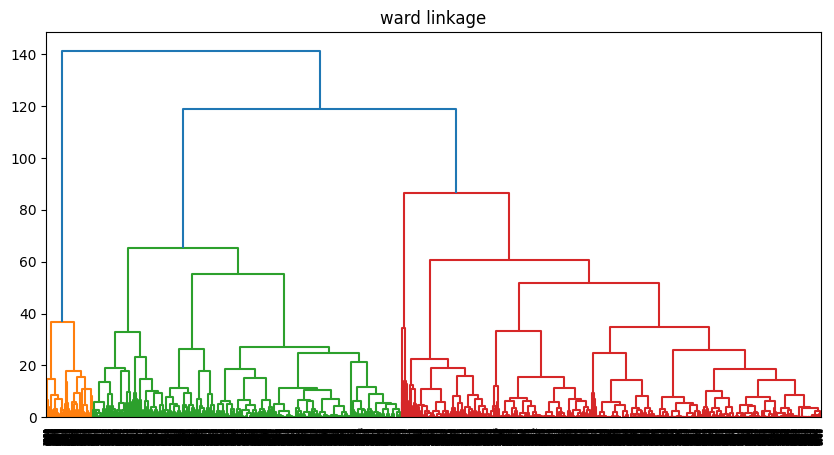

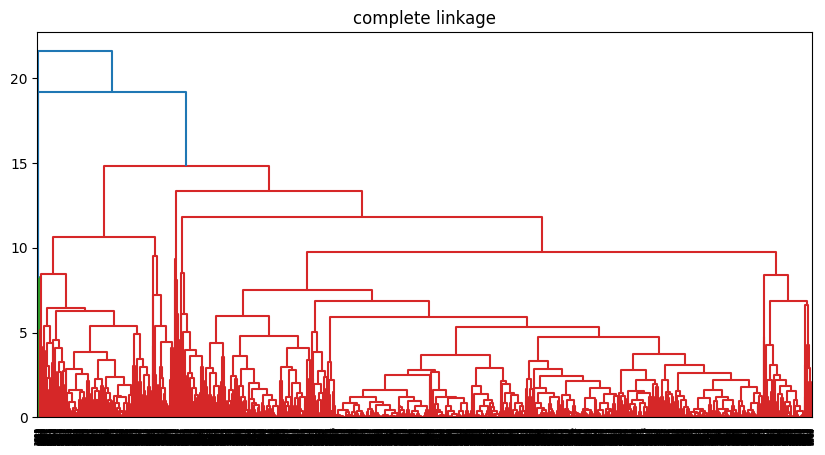

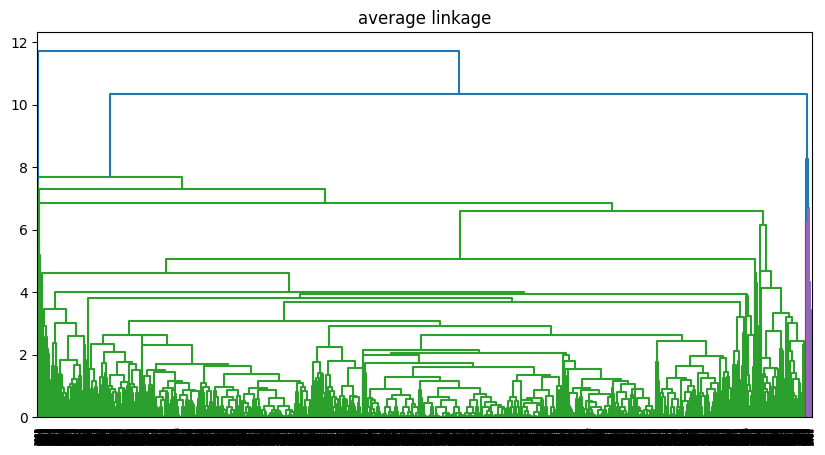

In [ ]:
for method in ['ward', 'complete', 'average']:
    Z = sch.linkage(scaled_sample, method=method)
    plt.figure(figsize=(10, 5))
    sch.dendrogram(Z)
    plt.title(f"{method} linkage")
    plt.show()

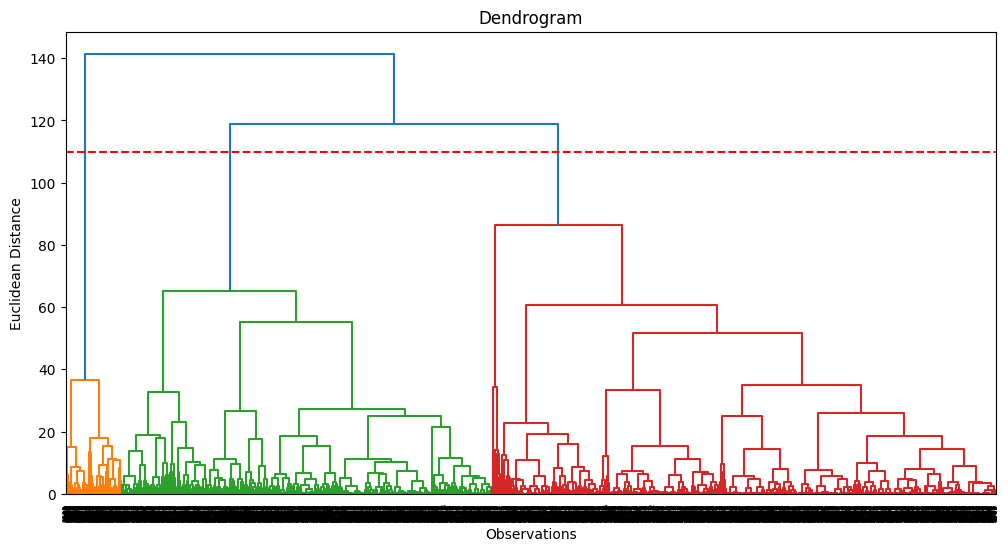

In [ ]:
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.axhline(y=110,  color='red',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.show()

Among all hierarchical linkage methods, **Ward linkage** produced the most meaningful clustering, suggesting three optimal clusters, as identified using appropriate cut-off points in the dendrogram

**Hierarchical Clustering with Ward Linkage (k = 3)**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 3, linkage='ward')
labels = agg.fit_predict(scaled_sample)
scaled_sample['agg_cluster'] = labels


In [ ]:
sample_2 = recent_df.sample(n=5000, random_state=42)
sample_2['agg_cluster'] = labels

sample_2.groupby('agg_cluster').agg({'email_hash':'count',
                                     'ctc':'mean',
                                     'orgyear':'mean',
                                      'Experience':'mean'})

,email_hash,ctc,orgyear,Experience
agg_cluster,,,,
0,2709,3.268145e+06,2017.240679,7.759321
1,1992,1.498568e+06,2012.465863,12.534137
2,299,2.665980e+06,2008.695652,16.304348


Applying hierarchical clustering with 3 clusters yielded a segmentation similar to K-Means. Each cluster is well-differentiated in terms of employee experience and salary, confirming the robustness of the clustering structure.

**Evaluation of Hierarchical Clusters**

In [ ]:
from sklearn. metrics import silhouette_score
sil_scores = {}
for k in range(2,8):
   model = AgglomerativeClustering(n_clusters=k, linkage='ward')
   labels = model.fit_predict(scaled_sample)
   val = silhouette_score(scaled_sample, labels)
   sil_scores[k] = val
sil_scores

{2: np.float64(0.37133599723657224),
 3: np.float64(0.4121004764677739),
 4: np.float64(0.4254901722223416),
 5: np.float64(0.39404053490477997),
 6: np.float64(0.3513078267757679),
 7: np.float64(0.3595097802814329)}

Although the Silhouette score is highest for **four clusters**, the difference compared to three clusters is marginal. Therefore, a **k = 4** model can be additionally evaluated for further validation.

**Hierarchical Clustering with Ward Linkage (k = 4)**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 4, linkage='ward')
labels = agg.fit_predict(scaled_sample)

sample_3 = recent_df.sample(n=5000, random_state=42)
sample_3['agg_cluster4'] = labels
sample_3.groupby('agg_cluster4').agg({'email_hash':'count',
                                     'ctc':'mean',
                                     'orgyear':'mean',
                                      'Experience':'mean'})

,email_hash,ctc,orgyear,Experience
agg_cluster4,,,,
0,1992,1.498568e+06,2012.465863,12.534137
1,2656,1.118552e+06,2017.26619,7.73381
2,302,3.117974e+06,2008.705298,16.294702
3,50,1.147606e+08,2016.34,8.66


In [ ]:
pca_h = PCA(n_components=2)
pca_scale_df =pca_h.fit_transform(scaled_sample)

pca_df = pd.DataFrame(pca_scale_df, columns=['PC1','PC2'])
pca_df['Cluster3'] = sample_2['agg_cluster'].values
pca_df['Cluster4']=sample_3['agg_cluster4'].values


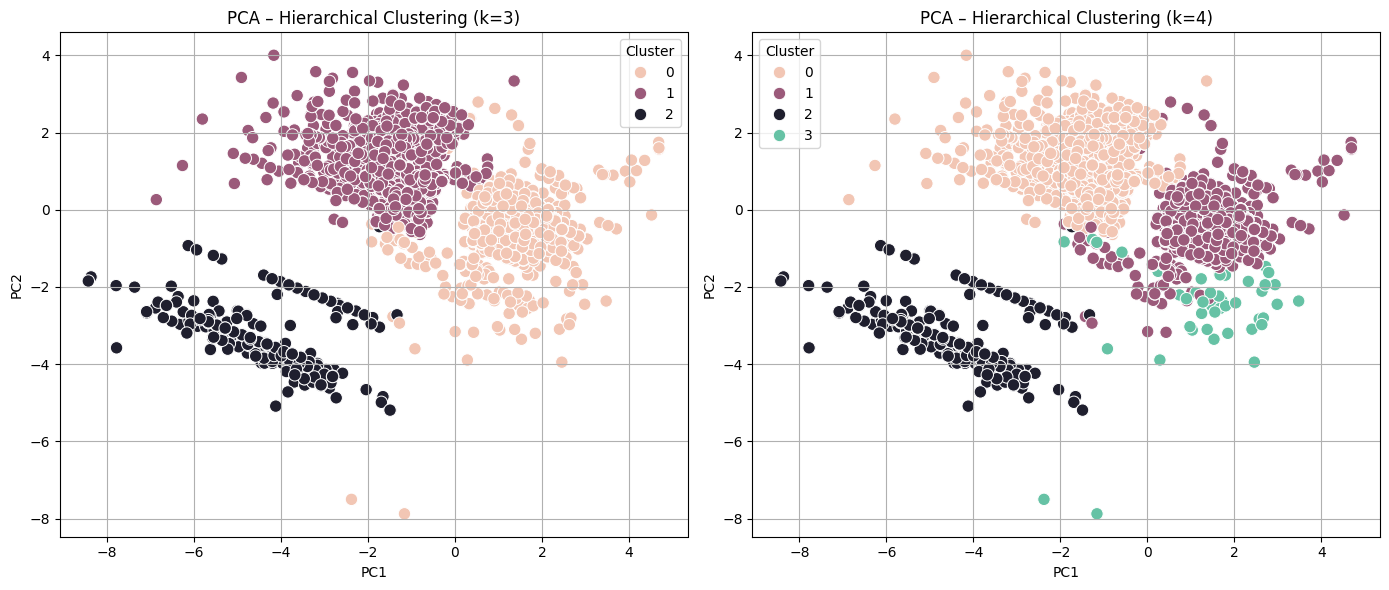

In [ ]:
plt.figure(figsize=(14,6))

# k=3 subplot
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster3',
    data=pca_df,
    palette=['#f2c6b4', '#9b5a7a', '#1f1f2e'],
    s=80
)
plt.title('PCA – Hierarchical Clustering (k=3)')
plt.grid(True)
plt.legend(title='Cluster')

# k=4 subplot
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster4',
    data=pca_df,
    palette=['#f2c6b4', '#9b5a7a', '#1f1f2e', '#66c2a5'],
    s=80
)
plt.title('PCA – Hierarchical Clustering (k=4)')
plt.grid(True)
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

**Interpretation**

When comparing the hierarchical models with k = 3 and k = 4, the k = 3 model performs better. The k = 4 model shows overlapping salary and experience patterns, making the clusters less distinguishable. In contrast, k = 3 provides clearer separation and more interpretable clusters, so it is finalized for this analysis.

**Hierarchical Cluster Profile**

In [ ]:
cluster_profile = sample_2.groupby('agg_cluster').agg({'email_hash':'count',
                                     'ctc':'mean',
                                     'orgyear':'mean',
                                      'Experience':'mean'})

job_role_cluster = (
    sample_2
    .groupby('agg_cluster')['job_position']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index(name='dominant_job_position')
)

job_role_cluster

cluster_profile = cluster_profile.merge(
    job_role_cluster,
    on='agg_cluster',
    how='left'
)

cluster_profile

,agg_cluster,email_hash,ctc,orgyear,Experience,dominant_job_position
0,0,2709,3.268145e+06,2017.240679,7.759321,Not Available
1,1,1992,1.498568e+06,2012.465863,12.534137,Backend Engineer
2,2,299,2.665980e+06,2008.695652,16.304348,Engineering Leadership


**Cluster 0 – Mid-Level / Mixed Roles**

*  This cluster contains learners whose job titles are missing or inconsistent. Based on their experience and compensation, they are mostly mid-level professionals. The cluster represents a broad group of contributors, with moderate experience and varied pay, reflecting role diversity and company-driven compensation differences.

**Cluster 1 Experienced Technical Professionals**

*  Cluster 1 consists of experienced technical contributors. While they do not hold leadership titles, their experience is significant, indicating senior individual contributors. Interestingly, their average CTC is lower than Cluster 0, highlighting that compensation is influenced by role type and company policy, not just experience.

**Cluster 2 – Leadership / Executive Roles**

*  This cluster clearly represents leadership or executive-level roles. The learners have the highest experience and high compensation, confirming a seniority-based hierarchy. These roles are strategic, decision-making positions within organizations

#Evaluation of K-means Clustering

**Within-Cluster Sum of Squares (WCSS)**

In [ ]:
wcss=kmeans_final.inertia_
print(f'WCSS is {wcss}')

WCSS is 621744.8477869283


**Between-Cluster Sum of Squares (BCSS)**

In [ ]:
#label
labels = kmeans_final.labels_
#mean
X = scaled_df
overall_mean = X.mean(axis=0)
overall_mean
#bcss
bcss=0
for k in np.unique(labels):
  cluster_points = X[labels == k]
  cluster_mean = cluster_points.mean(axis=0)
  n_k = cluster_points.shape[0]
  bcss += n_k * np.sum((cluster_mean - overall_mean) ** 2)
print(f'Between Cluster sum of square BCSS : {bcss}')

Between Cluster sum of square BCSS : 750312.8362651309


The **WCSS** (Within-Cluster Sum of Squares) value of 621,744.85 is lower than the **BCSS** (Between-Cluster Sum of Squares) value of 750,312.83, This suggests that the clusters are reasonably well separated, with relatively compact grouping around their respective centroids.

**Visual Inspection**

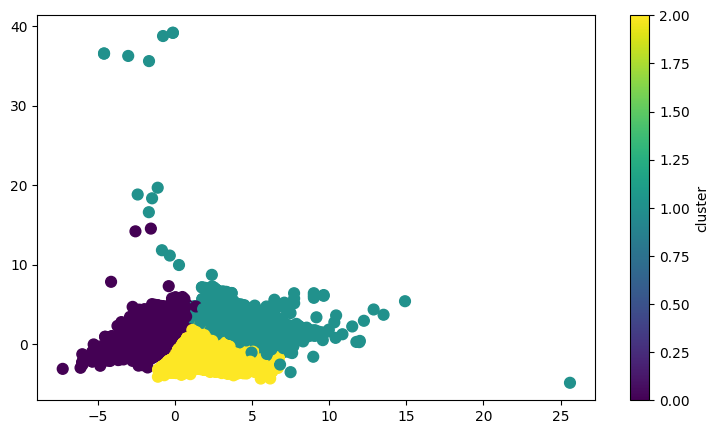

In [ ]:
plt.figure(figsize=(9,5))
pca_1 = PCA(n_components=2)
pca_k=pca_1.fit_transform(scaled_df)
x1=pca_k[:,0]
x2=pca_k[:,1]
plt.scatter(x1,x2,c=recent_df['kmeans_cluster'],s=60)
plt.colorbar(label='cluster')
plt.show()

**Cluster Distribution**

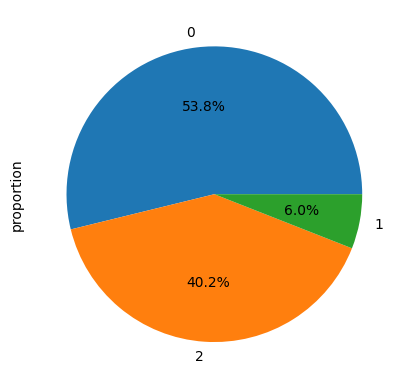

In [ ]:
recent_df['kmeans_cluster'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

**Interpretation**

*  About **53.8% of learners are fall into the largest cluster** (cluster 0).

*  Cluster 2 accounts for 40.2% of learners, while Cluster 1 contains only 6% learners, making it the smallest cluster.

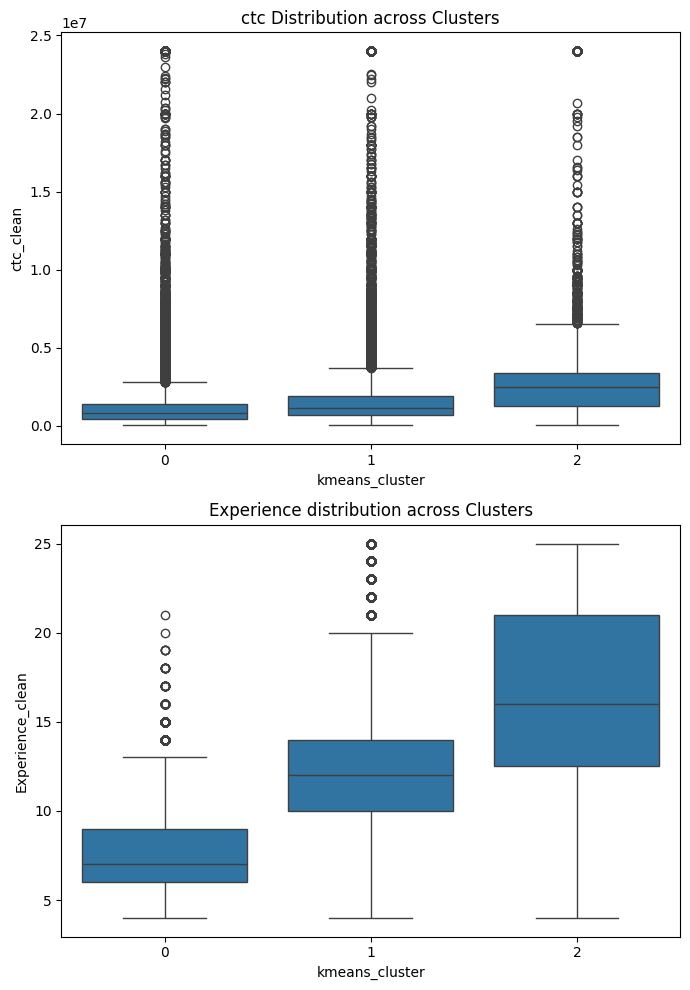

In [ ]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
sns.boxplot(y='ctc_clean', x='kmeans_cluster', data=recent_df)
plt.title('ctc Distribution across Clusters')

plt.subplot(2,1,2)
sns.boxplot(x='kmeans_cluster', y='Experience_clean', data=recent_df)
plt.title('Experience distribution across Clusters')

plt.tight_layout()
plt.show()

*  The median CTC for **Cluster 2** is higher than that of Cluster 0. Similarly, Cluster 2 represents learners with significantly **more experience (approximately 17 years)**, indicating leadership roles or higher positions.

*  Although learners in Cluster 1 have more median experience than those in Cluster 0, their compensation is **roughly equal to that of Cluster 0,** suggesting experience alone does not always translate to higher pay in this group.  

**Cluster profiles on Kmeans**

In [ ]:
cluster_df=recent_df.groupby('kmeans_cluster').agg(
                                    {'ctc':'mean',
                                     'orgyear':'mean',
                                     'Experience':'mean'
                                     }).reset_index()

num_profile=recent_df.groupby('kmeans_cluster').agg(
                                    learner_count=('email_hash','count'),
                                    avg_ctc=('ctc','mean'),
                                    avg_orgyear=('orgyear':'ctc'),
                                    avg_experience=('Experience','mean'))

In [ ]:
top_roles = (
    recent_df
    .groupby(['kmeans_cluster', 'job_position'])
    .size()
    .reset_index(name='count')
    .sort_values(['kmeans_cluster', 'count'], ascending=[True, False])
    .groupby('kmeans_cluster')
    .head(3)
)

top_roles

,kmeans_cluster,job_position,count
190,0,Not Available,29205
139,0,FullStack Engineer,14237
66,0,Backend Engineer,12481
472,1,Engineering Leadership,5978
502,1,Product Designer,1201
454,1,Backend Architect,978
618,2,Backend Engineer,20564
672,2,Not Available,5010
640,2,Frontend Engineer,4811


In [ ]:
top_roles_summary = (
    top_roles
    .groupby('kmeans_cluster')['job_position']
    .apply(lambda x: ', '.join(x))
    .reset_index(name='top_job_roles')
)
top_roles_summary

top_companies = (
    recent_df
    .groupby(['kmeans_cluster', 'company_hash'])
    .size()
    .reset_index(name='count')
    .sort_values(['kmeans_cluster', 'count'], ascending=[True, False])
    .groupby('kmeans_cluster')
    .head(3)
)

top_companies

top_companies_summary = (
    top_companies
    .groupby('kmeans_cluster')['company_hash']
    .apply(lambda x: ', '.join(x))
    .reset_index(name='top_companies')
)
cluster_profile = (
    num_profile
    .merge(top_roles_summary, on='kmeans_cluster', how='left')
    .merge(top_companies_summary, on='kmeans_cluster', how='left')
)

cluster_profile

,kmeans_cluster,learner_count,avg_ctc,avg_experience,top_job_roles,top_companies
0,0,82598,2.830623e+06,7.745611,"Not Available, FullStack Engineer, Backend Eng...","nvnv wgzohrnvzwj otqcxwto, xzegojo, zgn vuurxw..."
1,1,9148,3.884993e+06,16.860079,"Engineering Leadership, Product Designer, Back...","vagmt, gqvwrt, wxowg"
2,2,61697,1.877103e+06,12.464852,"Backend Engineer, Not Available, Frontend Engi...","vbvkgz, gqvwrt, bxwqgogen"


**Cluster Profiles and Insights (kmeans)**


**Cluster 0 – Early to Mid-Career Technical Learners**

*  This cluster consists primarily of learners with lower to moderate experience (average ~7.7 years).

*  The average CTC (~2.83M) is moderate compared to other clusters, indicating non-premium compensation.

*  A significant portion of learners have missing or unspecified job roles, which may suggest early-career professionals or incomplete profile information.

*  Among the specified roles, **FullStack Engineer and Backend Engineer** positions are most common.

*  Learners in this cluster are distributed across multiple companies, suggesting mass hiring technical roles rather than **specialized or leadership positions.**

**Cluster 1 - High value Leadership Profiles**

*   This cluster consists of learners with **the highest average salary and significant years of experience** compared to other clusters.

*  It account for approximately 6% of the total learners indicating a small but high-value segment.

*  Dominant job roles in this cluster include **Engineering Leadership, Backend Architect, and Product Designer**, which are typically **leadership positions**.

*  Such roles are assigned to only a limited number of employees within organizations due to their strategic importance.

*  The lower learner count in this cluster reflects the **specialized and leadership-oriented** nature of these roles, suggesting that companies hiring from this segment are focused on **experienced professionals for critical positions.**

**Cluster 2 - Lower-Salary Experienced Learners**

*  This cluster accounts for approximately **40% of learnres** and is characterized by a **lower average CTC (₹1.88M)** compared to the other clusters.

*  Although learners in this cluster have a **higher average experience (12.46 years)** than those in Cluster 0, their **average salary is significantly lower.**

*  **Backend Engineer and Frontend Engineer** are the most common roles in this cluster.

*  Similar to Cluster 0, many learners in this cluster have **missing job role information**, but Backend Engineer is the most common role among those reported.

*  Despite holding **similar roles and having more experience,** learners in this cluster are **paid less than those in Cluster 0,** indicating that company-level **salary policies and growth opportunities play a major role.**

*  This suggests that companies associated with this cluster may offer **slower salary progression,** even for experienced professionals.



**Trade-off Analysis**

**Cluster 0: Large Group with Moderate Salary**

*  This cluster has a large number of learners with moderate salaries.

*  It contains a **mixed group**: technical, non-technical, and unknown job roles.

*  Because this cluster is mixed, **designing one strategy is difficult.**

**Trade-off**

*  If Scaler focuses mainly on **non-technical learners,** technical learners may feel disappointed.

*  If Scaler focuses mainly on **technical learners,** non-technical learners may struggle with heavy technical content and may drop out.

*   Creating **separate programs** for each group would require:

      *  Different curriculam
      *  Different mentors
→ This increases cost and effort.

**Decision insight**

Although implementation is difficult, this cluster has a **large proportion,** so if handled correctly, it can bring many **new learners** and high overall impact.




**Cluster 1: High Value but Small Size**

*  This cluster includes **high-earning and well-profiled learners.**

*  Their **expectations are very high** in terms of course quality and mentorship.

**Trade-off:**

*  The **return on investment (ROI) is high**, but:

      *  Course delivery cost is also high

      *  Requires **highly experienced mentors**, preferably from **top tech companies**

*   The small size limits scale, but quality must be very high.

**Decision insight:**

This cluster is suitable for **premium programs,** where higher cost is justified by higher returns.


**Cluster 2: High Experience but Low Pay**

*  Learners in this cluster have **good experience but low salary.**

*  Many are looking for **career growth or job change.**

**Trade-off:**

*  These learners are highly motivated, but may need:

    *  Strong technical upskilling

    *  Career guidance and placement support

**Decision insight:**

*  This cluster is **valuable in the long term.**

*  Successful transitions can lead to:

     *  Strong word-of-mouth

     *  Referrals

     *  More enrollments at lower marketing cost

#Recommendations

**Cluster 0**

*  **Cluster 0** shows a significant presence of learners with **missing, unknown, or other job profiles,** which strongly indicates that a notable portion of learners are either **non-technical or currently without formal job roles.**

*  This suggests an opportunity for Scaler to **design or recommend entry-level, moderately priced courses with reduced coding intensity,** aimed at helping these learners secure their **first job with moderate salary expectations.**

*  Additionally, Cluster 0 includes learners who work as **Backend and Full-Stack Engineers**, most of whom are likely at the early stage of their careers. With the right upskilling and training, these learners can improve their **technical and system design skills** and gradually move into **senior roles.**

**Cluster 1**
*  This cluster represents a small but high-value segment (~6% of learners) with the highest average salary and significant experience.

*  For technical skill reinforcement, Scaler can offer advanced system design, cloud architecture, and application development courses tailored for Back-end Architects and senior technical roles. This will help them strengthen their expertise and transition into product or managerial roles.

*  Given the leadership profile of this cluster, customized leadership and management training can be offered to reinforce skills needed for Director-level or executive positions.



**Cluster 2**

*  Learners in this cluster have significant experience but earn less than peers in similar roles, indicating they may be stuck in low-paying jobs.

*  This shows that many people in this group are stuck in low-paying jobs even after gaining experience. Because of this, they are more likely to look for career change or better job opportunities.

*  These learners may approach Scaler to improve their skills and move to better-paying roles.

*  Scaler can help them by offering advanced skill training for backend and frontend engineers, such as Advanced technical training for Backend and Frontend roles (coding best practices, automation, AI tools).

*  Many experienced learners also need help with leading teams and managing work, not just technical skills. Learning these can help them move into senior or higher-paying roles.

*  Scaler can also work with companies that offer better salaries for experienced candidates, which can help place these learners in better jobs.

#Overall Recommendations

*  K-means captured 3 meaningful clusters; it is recommended over hierarchical clustering due to efficiency and similarity between some hierarchical clusters.

*  Data quality needs improvement, especially missing job profiles, to enhance cluster distinction.

*  Manual grouping (based on experience or CTC) shows some alignment with clusters, but clustering captures more nuanced patterns and relationships between features.

* Future improvements may come from adding new features and periodically re-running the clustering to reflect evolving learner profiles.

*  Recommend using anomaly detection to flag employees with unusually high salaries for further review.

#Clustering Feedback Loop

**Periodic Re-evaluation:**

*  Learner behavior and business patterns change over time. It is recommand that periodically checking, updating, and improving the clustering. Re-run clustering monthly, quarterly, or after X new learners. Check cluster statistics (size, salary distribution, roles) to ensure clusters remain meaningful.

**Incorporate New Data:**

   * **Option 1:** Re-run clustering on combined old + new data.

   * **Option 2:** Incrementally assign new learners to the nearest existing clusters using current centroids (like K-Means predict).

   * **Option 3:** If new learners differ significantly, consider creating a new cluster.

**Continuous Feedback Collection:**

*  Gather data on learner satisfaction, preferences, and outcomes. Use feedback to:

     * Adjust feature selection

     * Detect emerging patterns

     *  Validate cluster relevance and usefulness